# Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [5]:
# import libraries
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [6]:
# load Tables
data = pd.read_csv('data/train_flights_df_random.csv', sep = ',')

# make copy
train_flights_df = data.copy()

In [7]:
train_flights_df.head(10)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-11-13,AA,AA_CODESHARE,AA,3721,MQ,N694AE,3721,11953,GNV,...,294,11.0,0.0,0.0,0.0,16.0,NaN,NaN,NaN,NaN
1,2019-07-20,UA,UA_CODESHARE,UA,6068,YV,N507MJ,6068,10792,BUF,...,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-02-01,NK,NK,NK,731,NK,N682NK,731,13930,ORD,...,1744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-11-30,WN,WN,WN,4570,WN,N8311Q,4570,11697,FLL,...,1046,12.0,0.0,0.0,0.0,10.0,NaN,NaN,NaN,NaN
4,2019-01-19,AA,AA,AA,156,AA,N159AN,156,11697,FLL,...,1182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-12-30,AA,AA_CODESHARE,AA,3058,OO,N726SK,3058,12892,LAX,...,630,82.0,0.0,11.0,0.0,0.0,NaN,NaN,NaN,NaN
6,2019-01-08,DL,DL,DL,1117,DL,N673DL,1117,11697,FLL,...,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-06-22,WN,WN,WN,4119,WN,N239WN,4119,14679,SAN,...,853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-03-06,AA,AA_CODESHARE,AA,5156,OH,N248PS,5156,10257,ALB,...,318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-08-30,DL,DL_CODESHARE,DL,4855,OO,N875AS,4855,13377,MLU,...,448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# check shape (# of rowns and columns)
train_flights_df.shape

(70000, 42)

In [9]:
# check data types
train_flights_df.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled                int64
cancellation_code       object
diverted                 int64
dup                     object
crs_elapsed_time         int64
actual_elapsed_time    float64
air_time               float64
flights                  int64
distance

In [10]:
# dropping columns that dont look important
train_flights_df.drop(columns=['branded_code_share',
           'mkt_carrier', 'cancelled', 'cancellation_code', 'flights', 'air_time',
            'first_dep_time', 'total_add_gtime', 'longest_add_gtime'], inplace=True)

In [11]:
# select delay columns as they are important to the first task
train_flights_delays = train_flights_df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'arr_delay', 'dep_delay']]

In [12]:
# replace NaN in delay columns with mean
train_flights_delays.fillna(train_flights_delays.mean(), inplace=True)
train_flights_delays

C:\Users\Jagvir Dhesi\AppData\Local\Temp\ipykernel_12380\3835147371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_flights_delays.fillna(train_flights_delays.mean(), inplace=True)
C:\Users\Jagvir Dhesi\AppData\Local\Temp\ipykernel_12380\3835147371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_flights_delays.fillna(train_flights_delays.mean(), inplace=True)
C:\Users\Jagvir Dhesi\AppData\Local\Temp\ipykernel_12380\3835147371.py:2: SettingWithCopyWarning: 
A value is trying to be set on 

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay,dep_delay
0,11.000000,0.000000,0.000000,0.000000,16.000000,27.000000,28.000000
1,20.191778,3.450324,15.816368,0.157214,26.806928,-2.000000,0.000000
2,20.191778,3.450324,15.816368,0.157214,26.806928,-8.000000,27.000000
3,12.000000,0.000000,0.000000,0.000000,10.000000,22.000000,31.000000
4,20.191778,3.450324,15.816368,0.157214,26.806928,5.155428,10.225429
...,...,...,...,...,...,...,...
69995,0.000000,0.000000,26.000000,0.000000,1.000000,27.000000,1.000000
69996,20.191778,3.450324,15.816368,0.157214,26.806928,-18.000000,-13.000000
69997,20.191778,3.450324,15.816368,0.157214,26.806928,-24.000000,-5.000000
69998,20.191778,3.450324,15.816368,0.157214,26.806928,-32.000000,-7.000000


In [13]:
train_flights_delays.isnull().sum()

carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
arr_delay              0
dep_delay              0
dtype: int64

In [14]:
train_flights_delays

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay,dep_delay
0,11.000000,0.000000,0.000000,0.000000,16.000000,27.000000,28.000000
1,20.191778,3.450324,15.816368,0.157214,26.806928,-2.000000,0.000000
2,20.191778,3.450324,15.816368,0.157214,26.806928,-8.000000,27.000000
3,12.000000,0.000000,0.000000,0.000000,10.000000,22.000000,31.000000
4,20.191778,3.450324,15.816368,0.157214,26.806928,5.155428,10.225429
...,...,...,...,...,...,...,...
69995,0.000000,0.000000,26.000000,0.000000,1.000000,27.000000,1.000000
69996,20.191778,3.450324,15.816368,0.157214,26.806928,-18.000000,-13.000000
69997,20.191778,3.450324,15.816368,0.157214,26.806928,-24.000000,-5.000000
69998,20.191778,3.450324,15.816368,0.157214,26.806928,-32.000000,-7.000000


## **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [15]:
# normalize data with z-score as it can test for normal distribution and outliers
train_flights_delays_zscore = train_flights_delays.apply(zscore)
train_flights_delays_zscore

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,arr_delay,dep_delay
0,-0.347845,-2.796360e-01,-1.024324e+00,-4.284704e-02,-0.494026,4.579288e-01,3.897456e-01
1,0.000000,-7.198358e-17,2.300862e-16,-7.564515e-18,0.000000,-1.499996e-01,-2.242145e-01
2,0.000000,-7.198358e-17,2.300862e-16,-7.564515e-18,0.000000,-2.757779e-01,3.678184e-01
3,-0.310002,-2.796360e-01,-1.024324e+00,-4.284704e-02,-0.768309,3.531136e-01,4.555270e-01
4,0.000000,-7.198358e-17,2.300862e-16,-7.564515e-18,0.000000,-1.861893e-17,3.895043e-17
...,...,...,...,...,...,...,...
69995,-0.764118,-2.796360e-01,6.595278e-01,-4.284704e-02,-1.179734,4.579288e-01,-2.022873e-01
69996,0.000000,-7.198358e-17,2.300862e-16,-7.564515e-18,0.000000,-4.854084e-01,-5.092673e-01
69997,0.000000,-7.198358e-17,2.300862e-16,-7.564515e-18,0.000000,-6.111867e-01,-3.338502e-01
69998,0.000000,-7.198358e-17,2.300862e-16,-7.564515e-18,0.000000,-7.788910e-01,-3.777045e-01


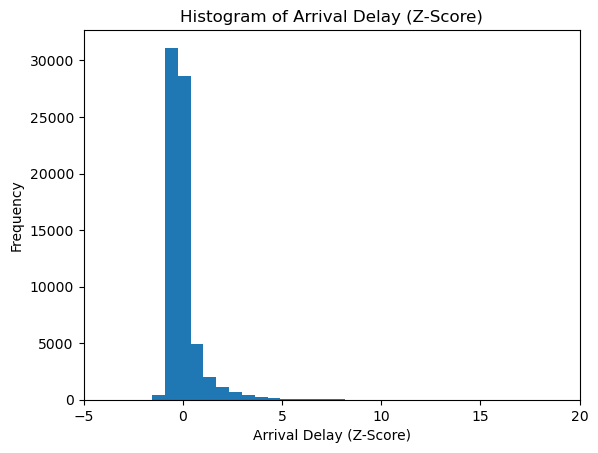

In [16]:
# plot arr_delay histogram
plt.hist(train_flights_delays_zscore['arr_delay'], bins=50)
plt.title("Histogram of Arrival Delay (Z-Score)")
plt.xlabel("Arrival Delay (Z-Score)")
plt.ylabel("Frequency")
plt.xlim(-5, 20)  # x-axis limits to show negative values
plt.show()

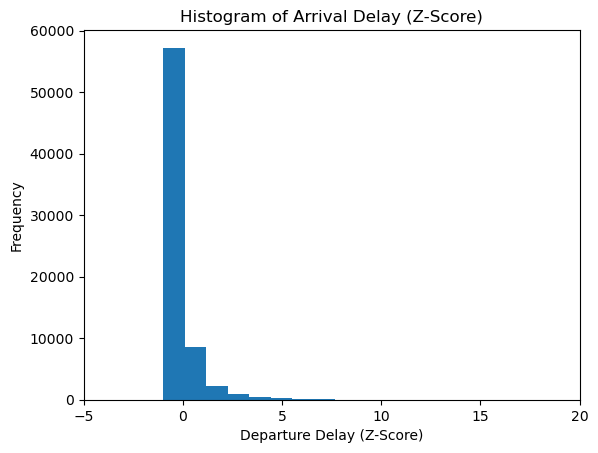

In [17]:
# plot dep_delay histogram
plt.hist(train_flights_delays_zscore['dep_delay'], bins=30)
plt.title("Histogram of Arrival Delay (Z-Score)")
plt.xlabel("Departure Delay (Z-Score)")
plt.ylabel("Frequency")
plt.xlim(-5, 20) # x-axis limits to show negative values
plt.show()

We can see both charts do not follow a normal distribution and seem skewd to the right. Also do not see any major outliers for both plots

### Arrival delay shapiro test

In [18]:
# shapiro-wilk normality test on arr_delay
stat, p_value = shapiro(train_flights_delays_zscore['arr_delay'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [19]:
# print the test results:
print(f"Shapiro-Wilk test statistic: {stat: .5f}, p-value: {p_value: .5f}") # .5f sets decimal of float to 5
if p_value > 0.05:
    print('arr_delay is normally distributed')
else:
    print('since p-value is less than 0.05 we can reject the null hypothesis & say it is not normally distributed.')

Shapiro-Wilk test statistic:  0.49568, p-value:  0.00000
since p-value is less than 0.05 we can reject the null hypothesis & say it is not normally distributed.


### Departure delay shapiro test

In [20]:
# shapiro-wilk normality test on dep_delay
stat, p_value = shapiro(train_flights_delays_zscore['dep_delay'])

In [21]:
print(f"Shapiro-Wilk test statistic: {stat: .5f}, p-value: {p_value: .5f}") # .5f sets decimal of float to 5
if p_value > 0.05:
    print('arr_delay is normally distributed')
else:
    print('since p-value is less than 0.05 we can reject the null hypothesis & say it is not normally distributed.')

Shapiro-Wilk test statistic:  0.38533, p-value:  0.00000
since p-value is less than 0.05 we can reject the null hypothesis & say it is not normally distributed.


## **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?